<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Gray-Scale-Images-(Single-Channel)" data-toc-modified-id="Gray-Scale-Images-(Single-Channel)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Gray-Scale Images (Single Channel)</a></span></li><li><span><a href="#RGB-Images" data-toc-modified-id="RGB-Images-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>RGB Images</a></span></li></ul></div>

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal

- Again, we have the following cell. Modify it depending on your platform, colab/local.

In [2]:
cat_dir = "data/kitten.png"
chipmonk_dir = "data/chipmonk.jpg"

## Gray-Scale Images (Single Channel)

- A gray scale image of size Height x Width is an array(matrix) of size Height x Width.


- Let's call this array A. Then $A[i,j]$ is a value between **0 (Black) and 255 (White)**

- As a convention, upper left corner is (0,0) and x increases from left to right while y incresases from top to bottom. 

In [3]:
#If I have 4x4 gray-scale image, it looks like as follows.
# Each entry holds a "scalar"
A = np.random.randint(0,255,size=(4,4))
A

array([[220, 230,   1, 156],
       [129, 162, 139, 202],
       [181,  85, 244,  33],
       [165,  40, 239,  90]])

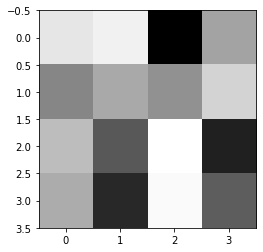

In [4]:
plt.imshow(A,cmap='gray')
plt.show()

In [5]:
print(A[2,0]) 
print(A[3,3]) 

181
90


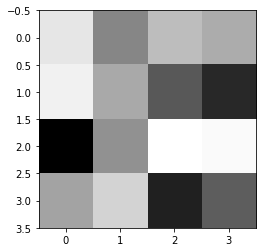

In [6]:
#switch rows and cols
At = A.transpose()
plt.imshow(At,cmap='gray')
plt.show()

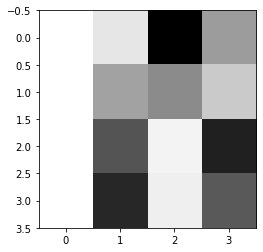

In [7]:
#Here is some trick
A[:,0] = 255; # all rows and first coloumns
A
plt.imshow(A,cmap='gray')
plt.show()

In [8]:
A_flat =  A.flatten()
print(A)
print(A_flat)

[[255 230   1 156]
 [255 162 139 202]
 [255  85 244  33]
 [255  40 239  90]]
[255 230   1 156 255 162 139 202 255  85 244  33 255  40 239  90]


In [9]:
A_flat.size

16

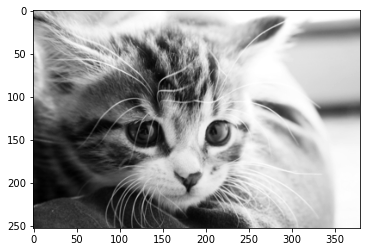

In [10]:
#find kitten.pnd in 
img = np.array(Image.open(cat_dir))
plt.imshow(img,cmap='gray')
plt.show()

In [11]:
print('height X width: ',img.shape)

height X width:  (253, 380)


In [12]:
#notice the black and white spots
print(img)

[[163 169 169 ... 255 255 255]
 [179 184 176 ... 255 255 255]
 [169 184 195 ... 255 255 255]
 ...
 [ 44  46  47 ... 248 248 248]
 [ 44  45  47 ... 248 247 247]
 [ 37  41  42 ... 249 247 247]]


In [13]:
#pixel value at [150,140], close to left eye.
print(img[150,140])

20


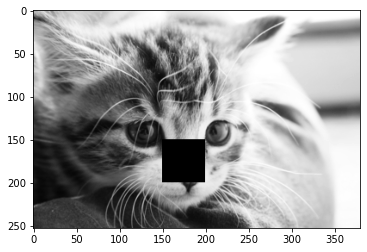

In [14]:
#what will happen?
imgnew = img.copy()
imgnew[150:200,150:200] = 0 # all pixels in these intervals...
plt.imshow(imgnew,cmap='gray')
plt.show()

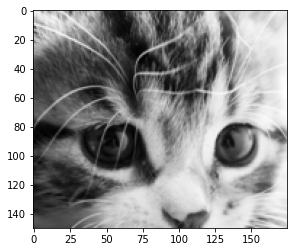

In [15]:
#trim the image
img2 = img[50:200,75:250]
plt.imshow(img2,cmap='gray')
plt.show()

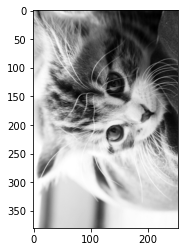

In [16]:
#what will happen?
imgnew = img.transpose()
plt.imshow(imgnew,cmap='gray')
plt.show()

## RGB Images 

In [19]:
#If I have 4x4 rgb image, it looks like
# read it like we have 4x4 matrix and we hold an array of size-3 in each entry
#A[0,0]--first row in the line a=nd etc
A = np.random.randint(0,255,size=(4,4,3))
A

array([[[229,  93,  61],
        [ 92, 119, 147],
        [ 62, 151,  99],
        [144, 165, 208]],

       [[229, 228, 139],
        [161, 232, 160],
        [247, 148,  35],
        [249, 226,  22]],

       [[103, 224,  17],
        [119,  72, 198],
        [154,  39,  96],
        [102,  47,  60]],

       [[220,  81, 176],
        [189, 233,  30],
        [110,  14,  33],
        [156, 229, 251]]])

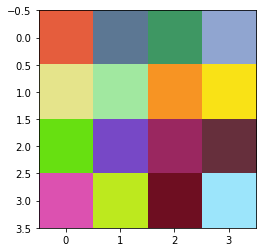

In [20]:
plt.imshow(A)
plt.show()

In [21]:
# R-G-B
print(A[1,0]) 

[229 228 139]


In [22]:
# This system means we actually have around 16M colours...
256*256*256

16777216

In [23]:
print(A[3,2,0]) #red
print(A[3,2,1]) #green
print(A[3,2,2]) #blue

110
14
33


In [24]:
print(A[:,:,0]) #red channel
print('=================')
print(A[:,:,1]) #blue channel
print('=================')
print(A[:,:,2]) #green channel

[[229  92  62 144]
 [229 161 247 249]
 [103 119 154 102]
 [220 189 110 156]]
[[ 93 119 151 165]
 [228 232 148 226]
 [224  72  39  47]
 [ 81 233  14 229]]
[[ 61 147  99 208]
 [139 160  35  22]
 [ 17 198  96  60]
 [176  30  33 251]]


In [25]:
(A.flatten()).size

48

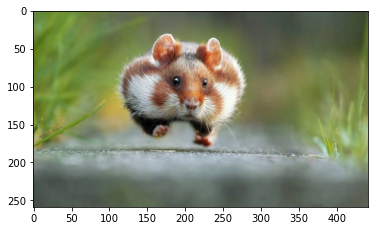

In [26]:
imgRGB = np.array(Image.open(chipmonk_dir))
plt.imshow(imgRGB)
plt.show()

In [27]:
print('height X width X channel: ',imgRGB.shape)

height X width X channel:  (259, 442, 3)


In [28]:
print('Left-upper corner: ',imgRGB[0,0])    # must be more green here..
print('Center-ish: ',imgRGB[100,200]) # more red

Left-upper corner:  [101 130  63]
Center-ish:  [135  84  67]


In [29]:
print(imgRGB[100,200,0]) #red 
print(imgRGB[100,200,1]) #green
print(imgRGB[100,200,2]) #blue

135
84
67


In [30]:
#using the same idea we can return channels seperately
temp_red = np.zeros(imgRGB.shape,dtype = np.uint8)
temp_red[:,:,0] = imgRGB[:,:,0]

temp_green = np.zeros(imgRGB.shape,dtype = np.uint8)
temp_green[:,:,1] = imgRGB[:,:,1]

temp_blue = np.zeros(imgRGB.shape,dtype = np.uint8)
temp_blue[:,:,2] = imgRGB[:,:,2]

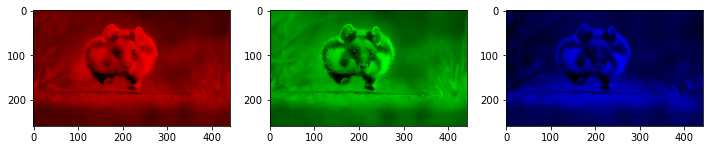

In [31]:
fig,ax =  plt.subplots(1,3,figsize=(12,5))
ax[0].imshow(temp_red)
ax[1].imshow(temp_green)
ax[2].imshow(temp_blue)
plt.show()